<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [1]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

Downloading...
From: https://drive.google.com/uc?id=1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS
To: /content/diabetes.csv
100% 23.8k/23.8k [00:00<00:00, 62.5MB/s]


In [7]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [26]:
df.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [27]:
missing_percent=df.isnull().sum()/len(df)*100
missing_percent

Pregnancies                 0.000000
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               1.041667
Insulin                     0.000000
BMI                         1.302083
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

In [28]:
import missingno as msno

<Axes: >

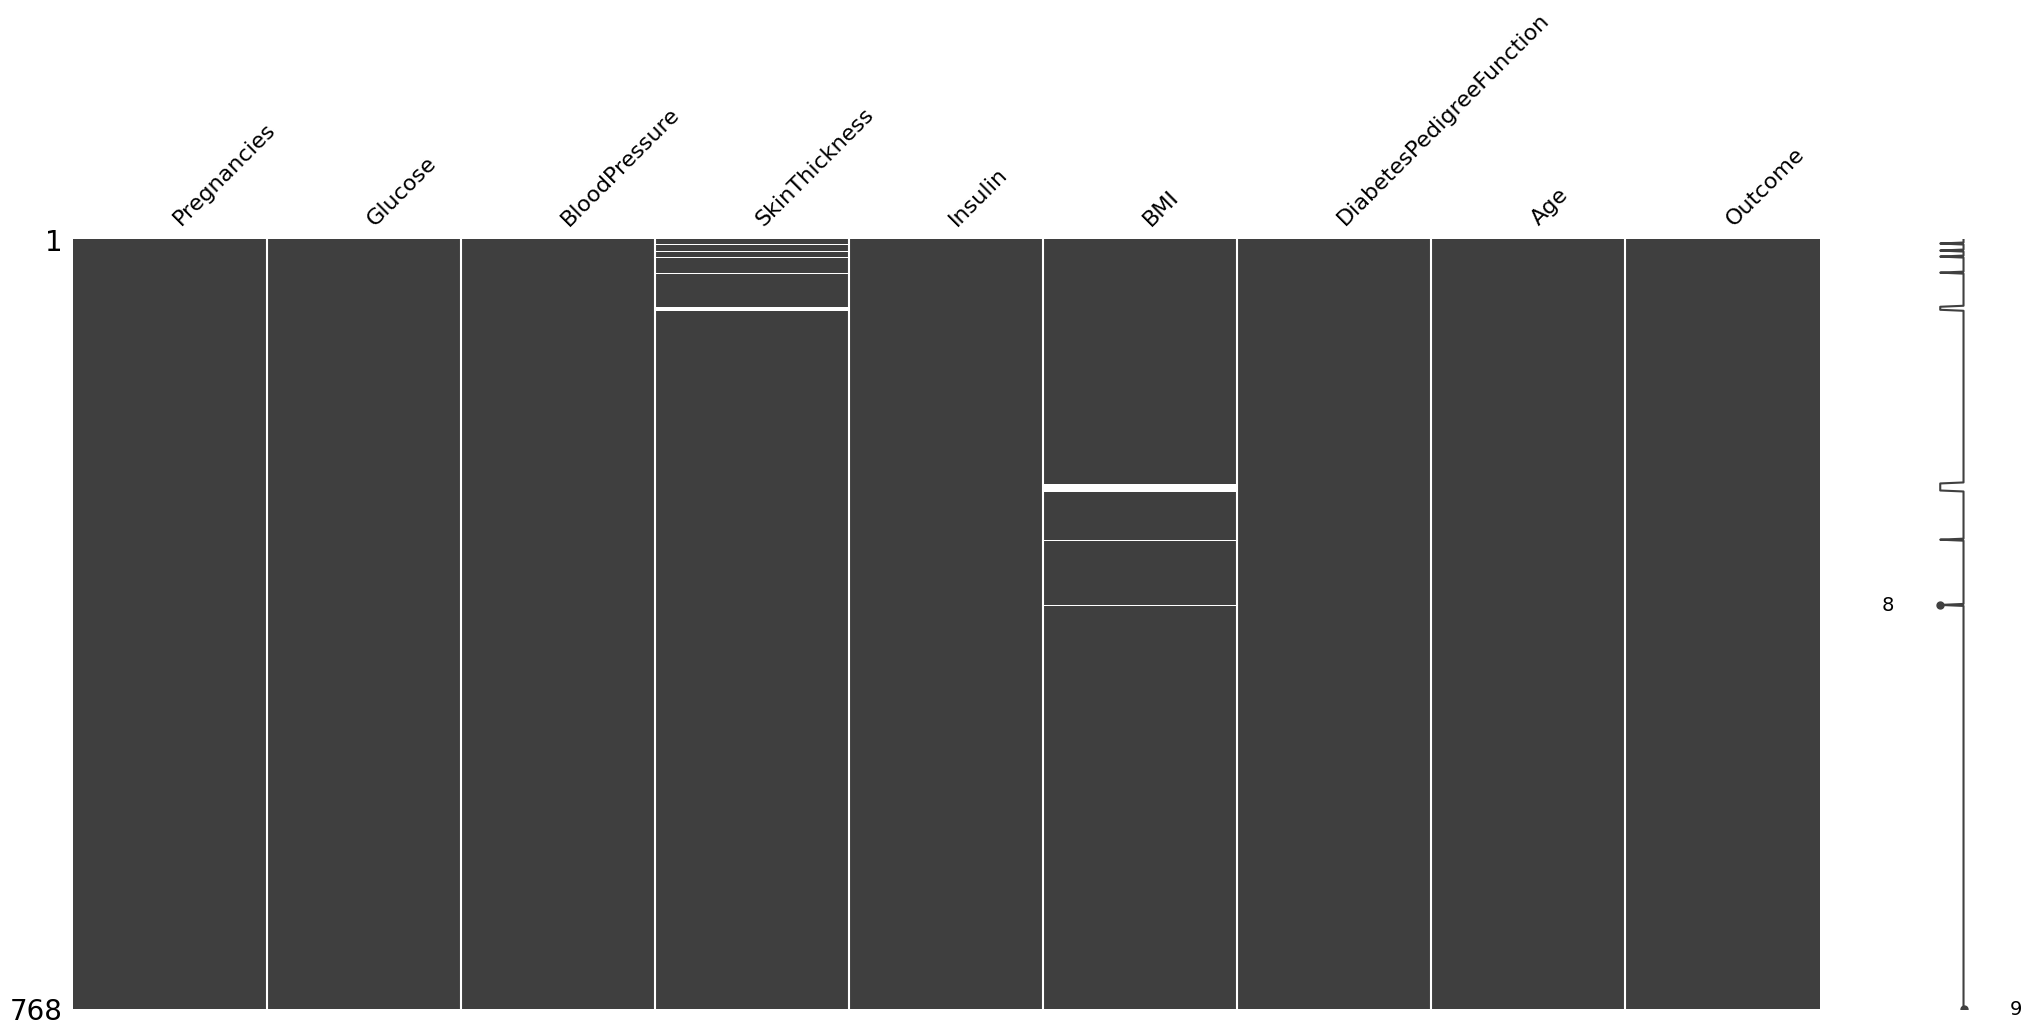

In [29]:
msno.matrix(df)

<Axes: >

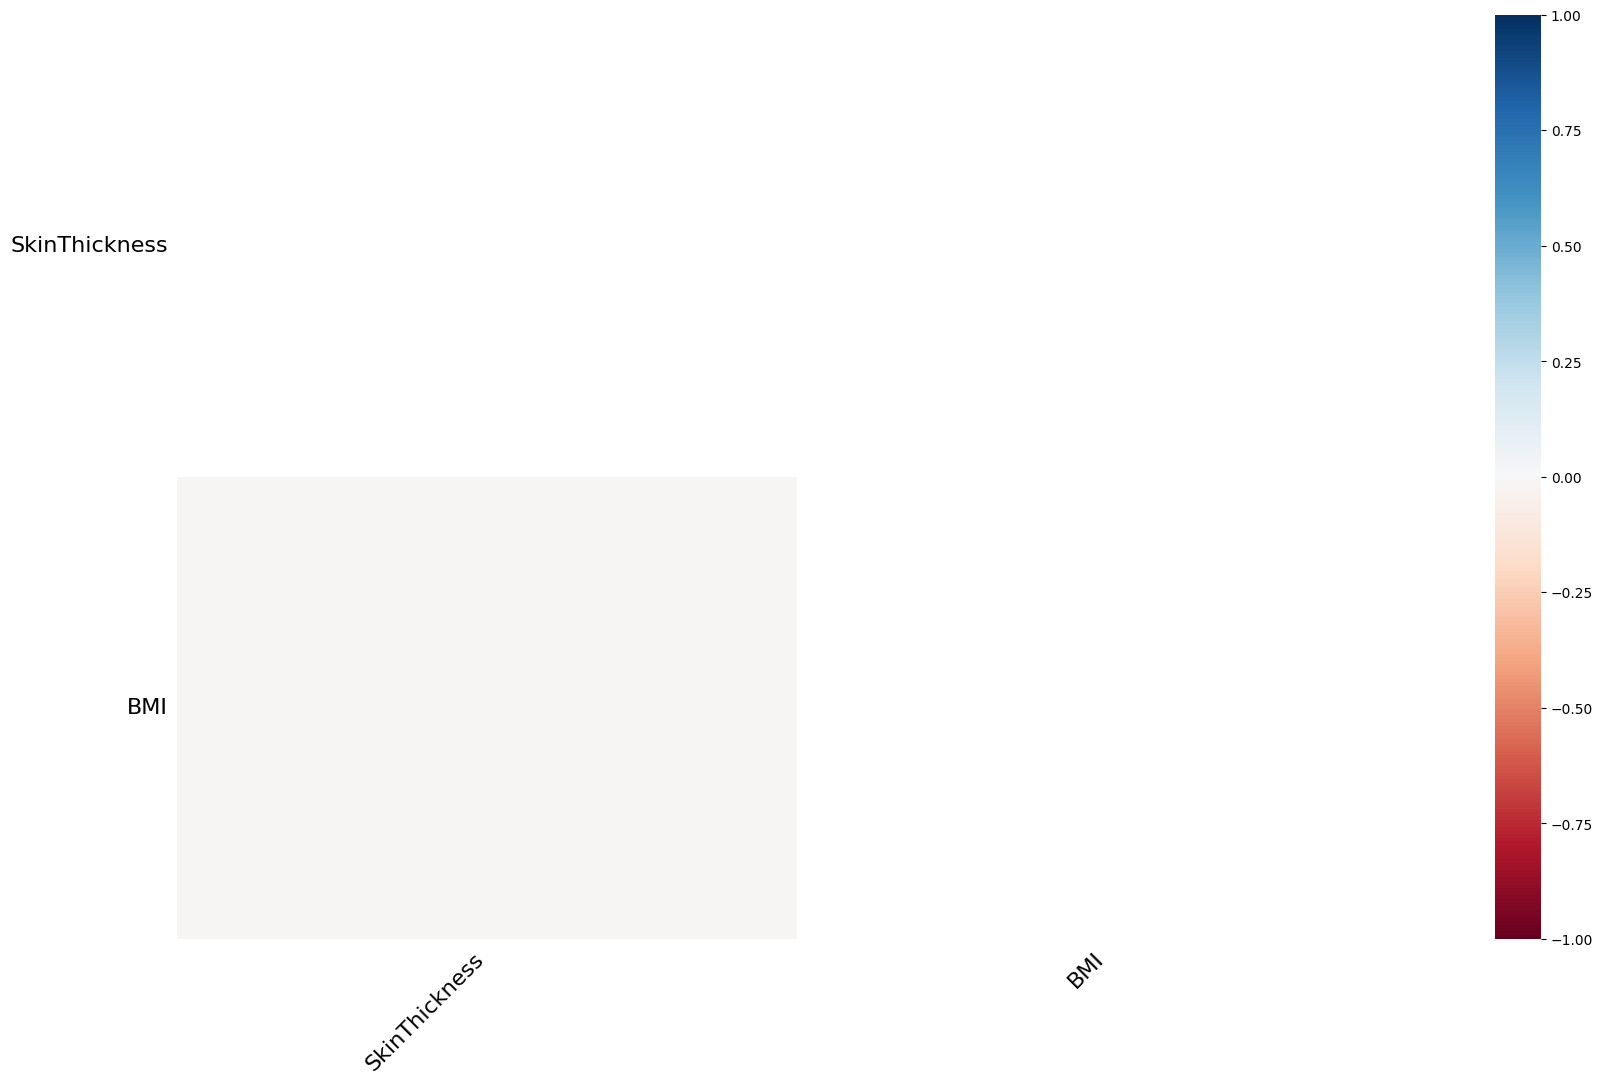

In [30]:
msno.heatmap(df)

<Axes: >

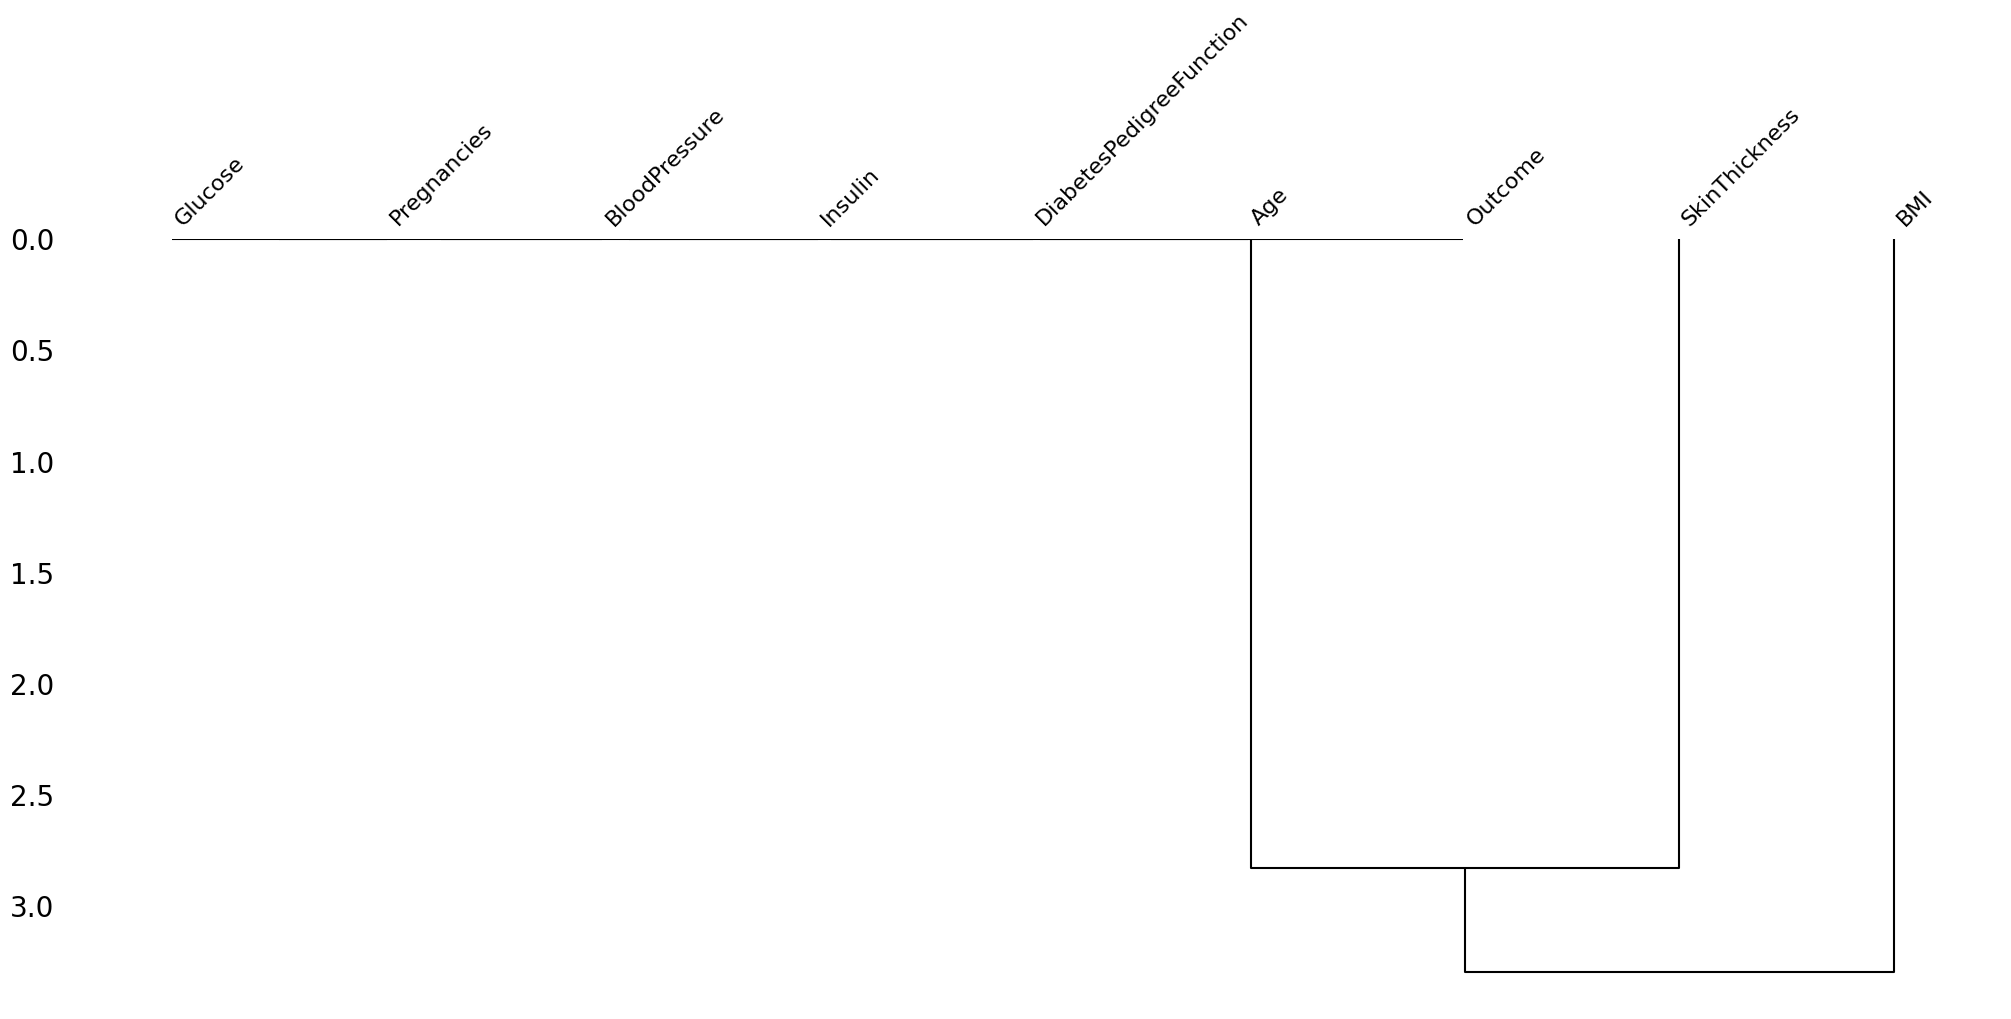

In [31]:
msno.dendrogram(df)

## <font color = 'Orange'>Handle the missing values</font>

In [32]:
from sklearn.impute import SimpleImputer, KNNImputer

In [33]:
constant_imputer = SimpleImputer(strategy = 'constant', fill_value = 0)

In [34]:
df['Pregnancies'] = constant_imputer.fit_transform([df['Pregnancies']])[0] 
#pod pretpostavka deka nemale pregnancy kaj tie sto fali inf za br na pregnancies 

In [35]:
frequent_imputer = SimpleImputer(strategy = 'most_frequent')

In [36]:
df['SkinThickness'] = frequent_imputer.fit_transform(df['SkinThickness'].values.reshape(1, -1))[0]

C:\Users\SS-Secret\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [ 5 12 18 34 68 69 70 71]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


ValueError: Length of values (760) does not match length of index (768)

In [37]:
df.BMI = df.BMI.fillna(df.BMI.mean())

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [38]:
df.to_csv('diabetes_No_MV.csv')

Print the first rows of your final Dataset

In [39]:
new_df=pd.read_csv('diabetes_No_MV.csv')

In [40]:
new_df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,4,0.0,137,40,35.0,168,43.1,2.288,33,1


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x = new_df.drop(columns='Outcome')
y = new_df['Outcome']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NameError: name 'X' is not defined

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)

In [46]:
knn.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [62]:
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.6818181818181818


## <font color = 'Orange'>Predict the outcomes for X test</font>

In [67]:
predictions = knn.predict(X_test)
print(predictions)

[0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [ ]:
#sporedba na predvidenite so vistinskite vrednosti
#for i in range(len(X_test)):
#    print(f"Actual: {y_test.iloc[i]}, Predicted: {predictions[i]}")

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [72]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

f1 = f1_score(y_test, predictions)
print(f1)

0.6818181818181818
0.4235294117647059
